In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
df = pd.read_csv('../raw_data/stock_prices_latest.csv', nrows=100000)

In [3]:
df.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   symbol             100000 non-null  object 
 1   date               100000 non-null  object 
 2   open               100000 non-null  float64
 3   high               100000 non-null  float64
 4   low                100000 non-null  float64
 5   close              100000 non-null  float64
 6   close_adjusted     100000 non-null  float64
 7   volume             100000 non-null  int64  
 8   split_coefficient  100000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.9+ MB


In [5]:
df = df.sort_values(by='date')
is_cpny = df['symbol']=='MSFT'
df = df[is_cpny]
date_final = pd.Series(df.iloc[-1:]['date'])
date_final

2348    2018-01-24
Name: date, dtype: object

<AxesSubplot:>

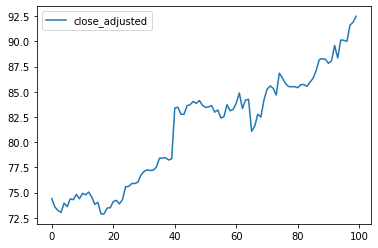

In [6]:
is_cpny = df['symbol']=='MSFT'
df_msft = df[is_cpny]
df_msft = df_msft.sort_values(by='date')
df_msft = df_msft.iloc[-100:]
df_msft = df_msft.reset_index().drop(columns='index')
df_msft = df_msft["close_adjusted"]
df_msft = pd.DataFrame(df_msft)
df_msft.plot()

In [7]:
df_msft.tail(10)

,close_adjusted
90,87.82
91,88.08
92,89.60
93,88.35
94,90.14
95,90.10
96,90.00
97,91.61
98,91.90
99,92.49


In [8]:
y = df_msft.close_adjusted

In [9]:
y

0     74.3935
1     73.5676
2     73.2393
3     73.0304
4     73.9656
       ...   
95    90.1000
96    90.0000
97    91.6100
98    91.9000
99    92.4900
Name: close_adjusted, Length: 100, dtype: float64

In [10]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(y)[1])

p-value:  0.9732070330172667


In [11]:
# First diff
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

p-value:  6.35701846005648e-14


In [12]:
# Second order diff
print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])

p-value:  9.781552285819646e-10


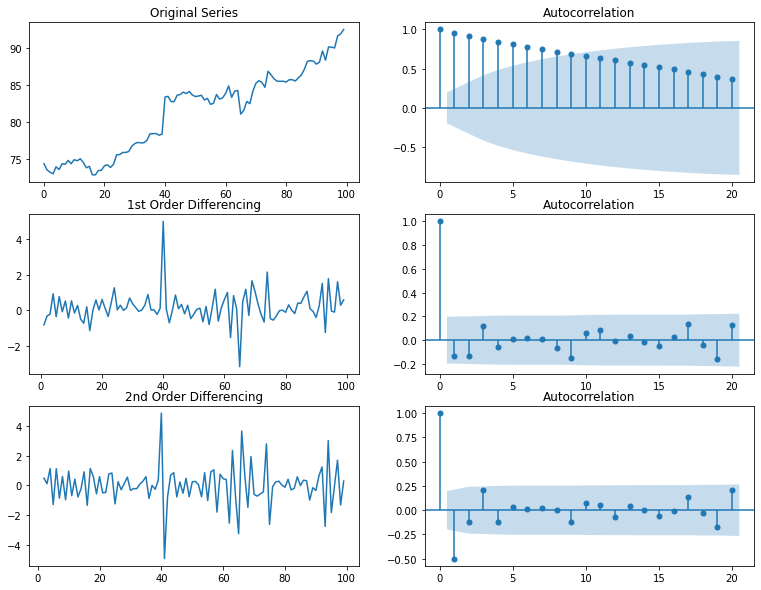

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [14]:
y_diff = y.diff().dropna()

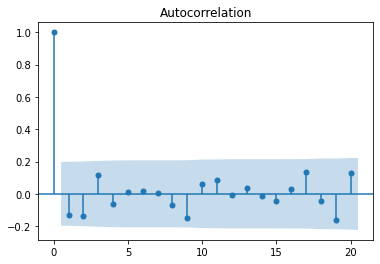

In [15]:
plot_acf(y_diff);

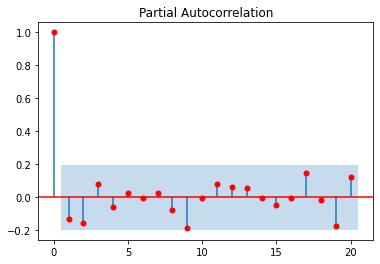

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(y_diff, c='r');

In [17]:
from statsmodels.tsa.arima_model import ARIMA

# 1. initialize the model
arima = ARIMA(y, order=(1, 1, 0))

# 2. fit the models
arima = arima.fit()

arima.summary()

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.close_adjusted   No. Observations:                   99
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -125.989
Method:                       css-mle   S.D. of innovations              0.864
Date:                Fri, 11 Jun 2021   AIC                            257.978
Time:                        10:58:20   BIC                            265.763
Sample:                             1   HQIC                           261.128
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1835      0.077      2.390      0.017       0.033       0.334
ar.L1.D.close_adjusted    -0.1319      0.100     -1.321      0.187      -0.328       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.5792           +0.0000j            7.5792            0.5000
-----------------------------------------------------------------------------
"""

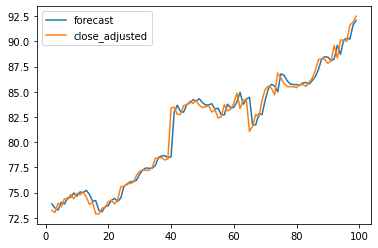

In [18]:
# Actual vs Fitted
arima.plot_predict(dynamic=False);

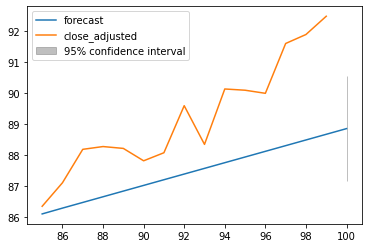

In [19]:
arima.plot_predict(85, 100, dynamic=True);

In [20]:
df_len = int(len(y)*0.8)
y_train = y[:df_len]
y_test = y[df_len:]

y_train.shape, y_test.shape

((80,), (20,))

In [21]:
y_train = y[:99]
y_test = y[99:]
arima = ARIMA(y_train, order=(1, 1, 1)).fit()

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 

In [22]:
(forecast, stderr, conf_int) = arima.forecast(1, alpha=0.05)

In [23]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])

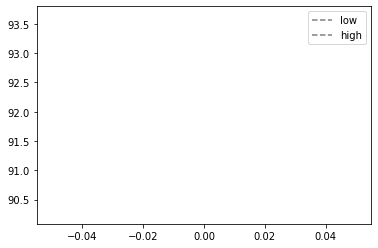

In [24]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend()

In [25]:
forecast.index = y_test.index
conf_int.index = y_test.index

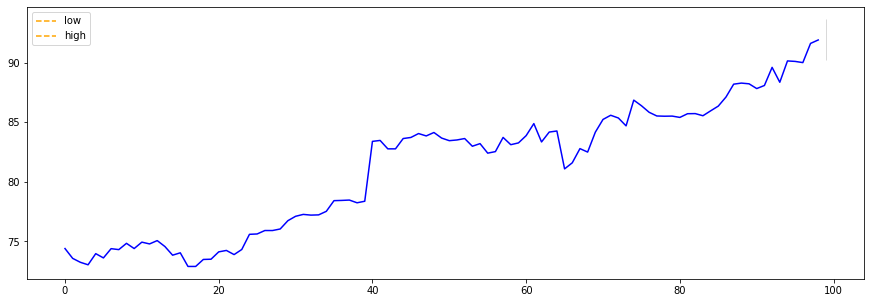

In [26]:
plt.figure(figsize=(15,5))
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='orange', ls='--')
plt.plot(conf_int['high'], label='high', c='orange', ls='--')
plt.plot(y_train, c='blue')
plt.plot(y_test, c='blue')
plt.legend()
plt.fill_between(y_test.index, conf_int['low'], conf_int['high'], color='k', alpha=.15)

<AxesSubplot:title={'center':'Residuals'}>

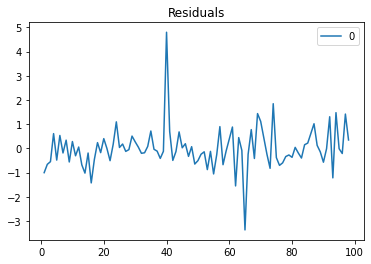

In [27]:
residuals = pd.DataFrame(arima.resid)
residuals.plot(title="Residuals")

<AxesSubplot:title={'center':'Residual density'}, ylabel='Density'>

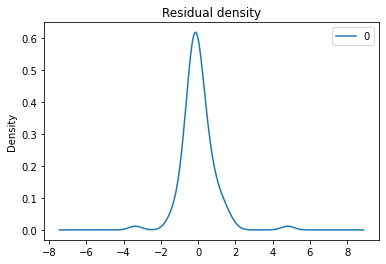

In [28]:
residuals.plot(kind='kde', title='Residual density')

In [29]:
import numpy as np
from statsmodels.tsa.stattools import acf
def forecast_accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    
    mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))  # Mean Absolute Percentage Error
    me = np.mean(y_pred - y_true)             # ME
    mae = np.mean(np.abs(y_pred - y_true))    # MAE
    mpe = np.mean((y_pred - y_true)/y_true)   # MPE
    rmse = np.mean((y_pred - y_true)**2)**.5  # RMSE
    corr = np.corrcoef(y_pred, y_true)[0,1]   # Correlation between the Actual and the Forecast
    mins = np.amin(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    maxs = np.amax(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

In [30]:
forecast, y_test

(99    91.941821
 Name: forecast, dtype: float64,
 99    92.49
 Name: close_adjusted, dtype: float64)

In [31]:
forecast_accuracy(forecast, y_test)

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


{'mape': 0.005926899007689382,
 'me': -0.548178889221191,
 'mae': 0.548178889221191,
 'mpe': -0.005926899007689382,
 'rmse': 0.548178889221191,
 'corr': nan,
 'minmax': 0.00592689900768939}

In [32]:
import pmdarima as pm

model = pm.auto_arima(y_train, 
                      start_p=0, max_p=3,
                      start_q=0, max_q=3, 
                      d=None,           # let model determine 'd'
                      test='adf',       # using adftest to find optimal 'd'
                      trace=True, error_action='ignore',  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=255.920, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=256.190, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255.524, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=257.923, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=256.873, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=255.974, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=256.847, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=259.059, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.437 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -124.762
Date:                Fri, 11 Jun 2021   AIC                            255.524
Time:                        10:58:23   BIC 

In [33]:
y_train, y_test

(0     74.3935
 1     73.5676
 2     73.2393
 3     73.0304
 4     73.9656
        ...   
 94    90.1400
 95    90.1000
 96    90.0000
 97    91.6100
 98    91.9000
 Name: close_adjusted, Length: 99, dtype: float64,
 99    92.49
 Name: close_adjusted, dtype: float64)

In [34]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
import itertools

range_p = [0,1,2]
range_d = [1]
range_q = [0,1,2]
grid = itertools.product(range_p, range_d, range_q)
orders = []
aics = []
fold_idxs = []
for (p,d,q) in grid:
    order = (p,d,q)
    folds = TimeSeriesSplit(n_splits=3)
    for fold_idx, (train_idx, test_idx) in enumerate(folds.split(y)):
        fold_idxs.append(fold_idx)
        y_train = y[train_idx]
        y_test = y[test_idx]
        model = ARIMA(y_train, order=order).fit()
        y_pred = model.forecast(len(y_test))[0]
        print(y_pred)
        orders.append(order)
        aics.append(model.aic)
        
        
results = pd.DataFrame(list(zip(fold_idxs, orders, aics)),#, r2s)), 
                   columns =['Fold', '(p,d,q)', 'AIC'])#, 'R2'])

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[75.63714583 75.68689166 75.73663749 75.78638332 75.83612916 75.88587499
 75.93562082 75.98536665 76.03511248 76.08485831 76.13460414 76.18434997
 76.23409581 76.28384164 76.33358747 76.3833333  76.43307913 76.48282496
 76.53257079 76.58231662 76.63206246 76.68180829 76.73155412 76.78129995
 76.83104578]
[83.8557449  84.0449898  84.23423469 84.42347959 84.61272449 84.80196939
 84.99121429 85.18045918 85.36970408 85.55894898 85.74819388 85.93743878
 86.12668367 86.31592857 86.50517347 86.69441837 86.88366327 87.07290816
 87.26215306 87.45139796 87.64064286 87.82988776 88.01913265 88.20837755
 88.39762245]
[87.01833108 87.18666216 87.35499323 87.52332431 87.69165539 87.85998647
 88.02831755 88.19664863 88.3649797  88.53331078 88.70164186 88.86997294
 89.03830402 89.2066351  89.37496617 89.54329725 89.71162833 89.87995941
 90.04829049 90.21662157 90.38495264 90.55328372 90.7216148  90.88994588
 91.05827696]
[75.49547776 75.5436292  75.59178063 75.63993207 75.6880835  75.73623494
 75.78438

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 

[75.53937903 75.67866772 75.65367117 75.77276565 75.76548101 75.86904075
 75.87538129 75.96699068 75.98381261 76.066229   76.09111391 76.16645844
 76.19754593 76.26745031 76.30330924 76.36902869 76.40855813 76.47105826
 76.51341129 76.5734349  76.61796004 76.67607855 76.7222746  76.77892759
 76.82640903]
[83.93083833 84.16163546 84.37571228 84.58145402 84.78304071 84.98255611
 85.18103897 85.37900711 85.57671865 85.77430229 85.97182217 86.16931025
 86.3667825  86.56424684 86.76170725 86.95916569 87.15662316 87.35408014
 87.55153687 87.74899348 87.94645004 88.14390656 88.34136307 88.53881957
 88.73627606]
[86.78799593 86.85521248 86.97881451 87.12702038 87.28596214 87.44958852
 87.61525904 87.78182151 87.94877319 88.1158947  88.28309031 88.45031826
 88.61756032 88.78480854 88.95205945 89.11931152 89.28656411 89.45381692
 89.62106983 89.78832278 89.95557575 90.12282873 90.29008171 90.45733469
 90.62458768]


/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 

[75.61192375 75.98935082 76.02155409 76.07335344 76.12404046 76.17479061
 76.22553718 76.27628396 76.32703072 76.37777748 76.42852424 76.47927101
 76.53001777 76.58076453 76.6315113  76.68225806 76.73300482 76.78375159
 76.83449835 76.88524511 76.93599188 76.98673864 77.0374854  77.08823217
 77.13897893]
[83.90285924 84.19051984 84.40167543 84.60188677 84.80053251 84.99895428
 85.19734401 85.39572916 85.59411365 85.79249805 85.99088243 86.18926681
 86.3876512  86.58603558 86.78441996 86.98280434 87.18118873 87.37957311
 87.57795749 87.77634188 87.97472626 88.17311064 88.37149502 88.56987941
 88.76826379]


/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[86.96693532 86.75460386 87.04770744 87.17373298 87.35498831 87.51798672
 87.68702019 87.8540587  88.02175667 88.18923664 88.35678868 88.52431689
 88.69185298 88.85938646 89.02692081 89.19445487 89.36198903 89.52952315
 89.69705728 89.86459142 90.03212555 90.19965968 90.36719381 90.53472794
 90.70226207]
[75.5928428  75.87216731 75.89351986 75.98924724 76.03074243 76.09094999
 76.13946784 76.1925102  76.24298677 76.29453287 76.34550863 76.39673382
 76.44783113 76.49898612 76.55011228 76.60125172 76.65238462 76.70352057
 76.75465504 76.8057902  76.85692503 76.90806002 76.95919493 77.01032988
 77.0614648 ]
[83.88062914 84.17354516 84.36216828 84.54417941 84.74188233 84.93980729
 85.13540834 85.33108814 85.52710674 85.72309749 85.91903962 86.1149882
 86.31094363 86.50689778 86.70285098 86.89880442 87.09475798 87.29071151
 87.48666501 87.68261853 87.87857204 88.07452556 88.27047908 88.46643259
 88.66238611]
[86.95969754 86.74016981 86.96264666 87.20099653 87.35019426 87.50618055
 87.679036

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 

[75.58410183 75.74052833 75.70983956 75.83169    75.82634875 75.92688988
 75.93927745 76.02505764 76.04973445 76.12528316 76.15847823 76.22693503
 76.26603451 76.32957556 76.37276767 76.43290139 76.47893029 76.53670222
 76.58469744 76.64083231 76.69019047 76.74519061 76.79549349 76.8497071
 76.90066482]
[83.90447762 84.20959716 84.4251483  84.611933   84.80581514 85.00542329
 85.20519616 85.40416208 85.60293353 85.80178257 86.00067657 86.19956866
 86.39845372 86.59733759 86.79622224 86.99510723 87.19399217 87.39287706
 87.59176194 87.79064683 87.98953172 88.18841661 88.3873015  88.58618639
 88.78507128]
[86.96138342 86.69406667 87.06792577 87.24300803 87.35898359 87.54714917
 87.71673058 87.87796348 88.04720489 88.21479757 88.38127986 88.5486376
 88.71586069 88.88294207 89.05011771 89.21728396 89.38443267 89.55159138
 89.71874966 89.88590583 90.05306304 90.22022028 90.38737726 90.55453435
 90.72169145]


/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[75.55259506 75.79916363 75.82384631 75.71715794 75.82137484 75.94933925
 75.91225725 75.9153413  76.02700514 76.07078687 76.05765885 76.11491004
 76.18979924 76.20620987 76.22999752 76.29465773 76.33951887 76.3609421
 76.40528837 76.45902223 76.49243318 76.52598684 76.57459287 76.61782024
 76.65174593]
[84.31045234 84.96941313 85.15583204 84.91331445 84.73944982 85.02994226
 85.66337064 86.16036553 86.2145252  86.00849569 85.99125938 86.38486541
 86.96125009 87.31103054 87.28970523 87.15610314 87.27355669 87.71716088
 88.21054501 88.44036517 88.39193208 88.34754726 88.5688535  89.01956956
 89.42135869]
[86.95799418 86.69103854 87.08085979 87.26321754 87.3608503  87.55665316
 87.72945107 87.88578067 88.05635751 88.22476025 88.39021955 88.55768447
 88.72501783 88.89185391 89.05896304 89.2260812  89.39311886 89.56019225
 89.72727113 89.89433743 90.06140818 90.22848032 90.39555056 90.56262131
 90.72969236]


/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 

In [35]:
results = results.sort_values('AIC').groupby('(p,d,q)').mean()['AIC'].sort_values()


In [36]:
results

(p,d,q)
(0, 1, 0)    124.920987
(0, 1, 1)    126.456375
(1, 1, 0)    126.550985
(2, 1, 0)    127.082173
(0, 1, 2)    127.189794
(1, 1, 1)    127.776267
(2, 1, 1)    128.822109
(1, 1, 2)    129.010290
(2, 1, 2)    129.626533
Name: AIC, dtype: float64

In [37]:
best_order = results.index[0]

In [38]:
model = ARIMA(y_train, order=best_order).fit()
model

In [39]:
(forecast, stderr, conf_int) = model.forecast(1, alpha=0.05)

In [40]:
forecast = pd.Series(forecast)
forecast

0    87.018331
dtype: float64

In [41]:
type(date_final), type(forecast)

(pandas.core.series.Series, pandas.core.series.Series)

In [42]:
def add_n_days(dates, n):
    for i in range(n):
        last = dates.iloc[-1]
        last = last + pd.DateOffset(days=1)
        dates = dates.append(last)
    return dates

In [43]:
from datetime import timedelta 

date_final = pd.DataFrame(date_final)
date_final = pd.DataFrame(pd.to_datetime(date_final['date']))

#date_final = add_n_days(date_final, 7)

In [44]:
date_final = date_final['date'].dt.strftime('%Y-%m-%d')

In [45]:
pd.DataFrame({'Date' : date_final.values,'Forecast' : forecast.values})

,Date,Forecast
0,2018-01-24,87.018331


In [46]:
forecast

0    87.018331
dtype: float64

In [47]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])

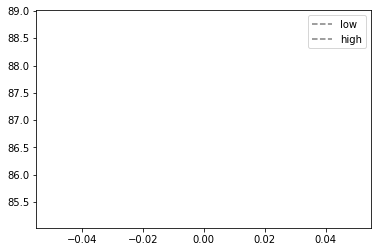

In [48]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend()

In [49]:
forecast.index = y_test.index
conf_int.index = y_test.index

ValueError: Length mismatch: Expected axis has 1 elements, new values have 25 elements

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='orange', ls='--')
plt.plot(conf_int['high'], label='high', c='orange', ls='--')
plt.plot(y_train, c='blue')
plt.plot(y_test, c='blue')
plt.legend()
plt.fill_between(y_test.index, conf_int['low'], conf_int['high'], color='k', alpha=.15)

In [ ]:
forecast = forecast.reset_index(drop = True)

In [ ]:
y_test = y_test.reset_index(drop = True)

In [ ]:
forecast_accuracy(forecast, y_test)